In [17]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('edges_completo.csv')
df

,Source,Target,Type,Id,Label,timeset,Weight
0,0,12,Undirected,0,NaN,NaN,32.8
1,12,1,Undirected,1,NaN,NaN,17.0
2,12,13,Undirected,2,NaN,NaN,15.3
3,0,13,Undirected,3,NaN,NaN,38.0
4,2,13,Undirected,4,NaN,NaN,18.8
...,...,...,...,...,...,...,...
331,95,111,Undirected,339,NaN,NaN,8.0
332,121,111,Undirected,340,NaN,NaN,8.0
333,86,96,Undirected,341,NaN,NaN,8.0
334,110,96,Undirected,342,NaN,NaN,8.0


In [24]:
 lista_edges = ["{{source}} {{target}} {'weight': {{weight}}}".replace("{{source}}", str(v[0])).replace("{{target}}", str(v[1])).replace("{{weight}}", str(v[6])) for v in df.values.tolist()]
 lista_edges

["0 12 {'weight': 32.8}",
 "12 1 {'weight': 17.0}",
 "12 13 {'weight': 15.3}",
 "0 13 {'weight': 38.0}",
 "2 13 {'weight': 18.8}",
 "2 14 {'weight': 24.0}",
 "12 14 {'weight': 39.0}",
 "3 14 {'weight': 25.0}",
 "3 15 {'weight': 12.0}",
 "16 15 {'weight': 45.0}",
 "16 11 {'weight': 11.0}",
 "26 11 {'weight': 24.0}",
 "26 25 {'weight': 65.0}",
 "24 25 {'weight': 36.0}",
 "24 5 {'weight': 22.0}",
 "24 23 {'weight': 30.0}",
 "5 23 {'weight': 13.0}",
 "4 23 {'weight': 14.0}",
 "22 23 {'weight': 31.0}",
 "22 4 {'weight': 17.0}",
 "5 22 {'weight': 25.0}",
 "14 22 {'weight': 71.0}",
 "14 15 {'weight': 30.0}",
 "23 21 {'weight': 70.0}",
 "10 21 {'weight': 54.0}",
 "10 9 {'weight': 63.0}",
 "7 9 {'weight': 80.0}",
 "6 9 {'weight': 7.0}",
 "6 7 {'weight': 80.0}",
 "8 10 {'weight': 75.0}",
 "18 21 {'weight': 60.0}",
 "18 19 {'weight': 23.0}",
 "17 19 {'weight': 22.0}",
 "19 20 {'weight': 40.0}",
 "6 30 {'weight': 9.3}",
 "6 32 {'weight': 14.8}",
 "6 33 {'weight': 13.5}",
 "6 34 {'weight': 10.0}",


In [25]:
G = nx.parse_edgelist(lista_edges, nodetype=int)
list(G.edges(data=True))

[(0, 12, {'weight': 32.8}),
 (0, 13, {'weight': 38.0}),
 (0, 82, {'weight': 19.0}),
 (0, 83, {'weight': 14.7}),
 (0, 84, {'weight': 13.3}),
 (0, 85, {'weight': 12.0}),
 (0, 86, {'weight': 13.7}),
 (0, 88, {'weight': 15.4}),
 (0, 20, {'weight': 17.4}),
 (12, 1, {'weight': 17.0}),
 (12, 13, {'weight': 15.3}),
 (12, 14, {'weight': 39.0}),
 (13, 2, {'weight': 18.8}),
 (2, 14, {'weight': 24.0}),
 (14, 3, {'weight': 25.0}),
 (14, 22, {'weight': 71.0}),
 (14, 15, {'weight': 30.0}),
 (3, 15, {'weight': 12.0}),
 (15, 16, {'weight': 45.0}),
 (16, 11, {'weight': 11.0}),
 (11, 26, {'weight': 24.0}),
 (26, 25, {'weight': 65.0}),
 (25, 24, {'weight': 36.0}),
 (24, 5, {'weight': 22.0}),
 (24, 23, {'weight': 30.0}),
 (24, 27, {'weight': 53.0}),
 (5, 23, {'weight': 13.0}),
 (5, 22, {'weight': 25.0}),
 (23, 4, {'weight': 14.0}),
 (23, 22, {'weight': 31.0}),
 (23, 21, {'weight': 70.0}),
 (4, 22, {'weight': 17.0}),
 (21, 10, {'weight': 54.0}),
 (21, 18, {'weight': 60.0}),
 (10, 9, {'weight': 63.0}),
 (10,

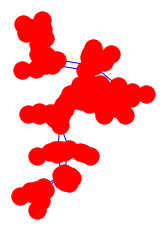

In [26]:
plt.subplot(121)
nx.draw(G, node_color='r', edge_color='b')   # default spring_layout
# plt.subplot(122)

In [27]:
nodes = pd.read_csv('nodes_completo.csv')
nodes = nodes[['Id','Label']]
nodes

,Id,Label
0,0,sbc_alfa1_entrada_sul
1,1,sbc_delta_entrada_leste
2,2,sbc_beta_entrada_oeste
3,3,sbc_ru_entrada norte
4,4,sbc_delta_entrada_sul
...,...,...
120,120,laboratorio_alfa1_305
121,121,escada_alfa1_esquerda_3a
122,122,escada_alfa1_direita_3a
123,123,laboratorio_alfa1_306


In [28]:
depara_temp = nodes.to_dict()
string_to_index = {y:x for x,y in depara_temp["Label"].items()}
index_to_string = {x:y for x,y in depara_temp["Label"].items()}

def caminho(node1, node2):
    id_inicio = string_to_index[node1]
    id_fim = string_to_index[node2]
    path = nx.shortest_path(G, source=id_inicio, target=id_fim)
    path_string = [index_to_string[index] for index in path]
    return path_string

caminho('laboratorio_alfa1_303', 'sbc_alfa2_entrada_norte')

['laboratorio_alfa1_303',
 'escada_alfa1_direita_3a',
 'escada_alfa1_direita_2a',
 'escada_alfa1_direita_1a',
 'escada_alfa1_direita_terreo',
 'sbc_alfa1_entrada_sul',
 'sbc_tranferencia_1',
 'sbc_transferencia_3',
 'sbc_transferencia_10',
 'sbc_transferencia_11',
 'sbc_transferencia_12',
 'sbc_alfa2_entrada_sul',
 'sbc_alfa2_entrada_norte']

In [23]:
def distancia(node1, node2):
    id_inicio = string_to_index[node1]
    id_fim = string_to_index[node2]


    distancia = nx.dijkstra_path_length(G, source=id_inicio, target=id_fim)
    
    return distancia

distancia('laboratorio_alfa1_303', 'sbc_alfa2_entrada_norte')

298.7